In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [132]:
df = pd.read_csv('./housing.csv')
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### One Hot Encoding Categrical Values

In [135]:
p_df = df.copy()
OEH_df = pd.concat([p_df,pd.get_dummies(p_df['ocean_proximity'], prefix='OP')],axis=1)
OEH_df.drop(['ocean_proximity'],axis=1, inplace=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,OP_<1H OCEAN,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [136]:
pp_df_mhv = OEH_df.pop('median_house_value')
OEH_df['median_house_value'] = pp_df_mhv

### Dropping Missing Values

In [139]:
preprocess_df = OEH_df.dropna()

In [140]:
preprocess_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,OP_<1H OCEAN,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


### Spliting Train data, Test data

In [447]:
def pp(preprocess_df):
    feats = preprocess_df.iloc[:,:-1].values
    price = preprocess_df.iloc[:,-1].values.reshape(-1,1)
    x_train, x_test, y_train, y_test = train_test_split(feats, price)
    X_train = StandardScaler().fit_transform(x_train)
    X_test = StandardScaler().fit_transform(x_test)
    Y_train = StandardScaler().fit_transform(y_train).ravel()
    Y_test = StandardScaler().fit_transform(y_test).ravel()
    
    return x_train, x_test, y_train, y_test, X_train, X_test, Y_train, Y_test, feats, price

In [538]:
x_train, x_test, y_train, y_test, X_train, X_test, Y_train, Y_test, feats, price = pp(preprocess_df)

array([1., 1., 0., ..., 1., 0., 1.])

### Understanding Data

<AxesSubplot:>

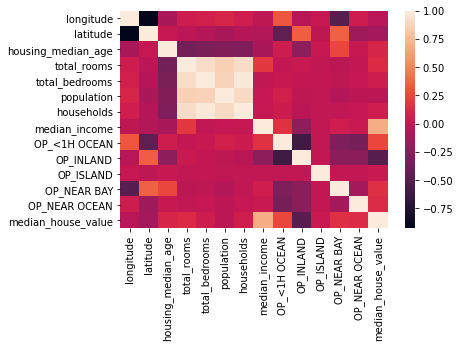

In [152]:
cor = preprocess_df.corr()

sns.heatmap(cor, 
    xticklabels=cor.columns,
    yticklabels=cor.columns)

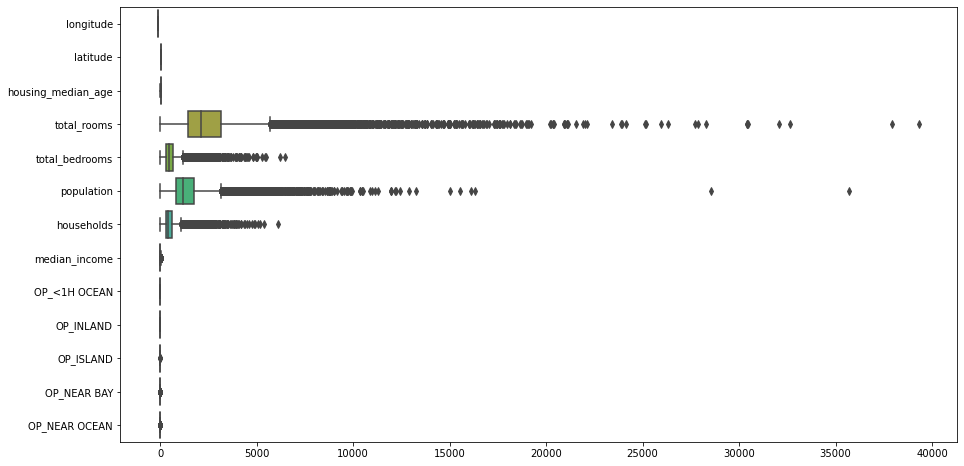

0         880.0
1        7099.0
2        1467.0
3        1274.0
4        1627.0
          ...  
20635    1665.0
20636     697.0
20637    2254.0
20638    1860.0
20639    2785.0
Name: total_rooms, Length: 20433, dtype: float64

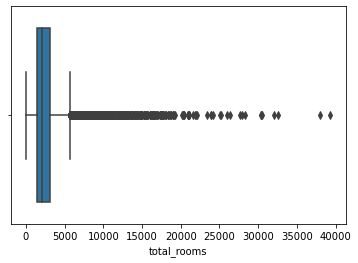

In [372]:
plt.figure(figsize=(15,8))
sns.boxplot(data=preprocess_df.iloc[:,:-1],orient="h")
plt.show()
sns.boxplot(x=preprocess_df['total_rooms'],orient="h")
preprocess_df['total_rooms']

### Random Forest

#### Without Scale

In [471]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
from sklearn.ensemble import RandomForestRegressor

def randomeForest(n, rf_RMSE, rf_r2_train, rf_r2_test, rf_y_pred, x_train, x_test, y_train, y_test):
    for i in range(3, int(n/10)):
        rf = RandomForestRegressor(n_estimators=int(i*10), oob_score=True, random_state=0)
        rf.fit(x_train, y_train.ravel())

        rf_oob_y_predict = rf.predict(x_train)
        rf_y_pred.append(rf.predict(x_test))
        
        rf_r2_train.append(rf.score(x_train, y_train.ravel()))
        rf_RMSE.append(np.sqrt(mean_squared_error(y_test, rf_y_pred[i-3])))
        rf_r2_test.append(r2_score(y_test,  rf_y_pred[i-3]))

    return rf_RMSE, rf_r2_train, rf_r2_test, rf_y_pred, rf

In [520]:
N = 120
def plottingResults(N, RMSE, r2_train, r2_test):
    plot_x = []
    for i in range(3, int(N/10)):
        plot_x.append(i*10)
        print("Random Forest model performance at n_estimators =", int((i)*10))
        print('Root Mean Squared Error: %.2f'% RMSE[i-3])
        print(f'Out-of-bag R-2 score estimate: {r2_train[i-3]:>5.4}')
        print(f'Test data R-2 score: {r2_test[i-3]:>5.4}')
        print("-------------------------------------------------------")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    ax1.plot(plot_x, RMSE, label="RMSE", color="green")
    ax1.set_xlabel("n_estimator")
    ax1.set_ylabel("Root Mean Square Error")
    ax1.legend()

    ax2.plot(plot_x, r2_train, label="Out Of Bag R2")
    ax2.plot(plot_x, r2_test, label="Test Data R2")
    ax2.set_xlabel("n_estimator")
    ax2.set_ylabel("Root Mean Square Error")
    ax2.legend()
        

In [ ]:
def plottingPred(y, y_p, rf_RMSE, rf_r2_train, rf_r2_test):
    fig, axs = plt.subplots(3, 3, figsize=(20,20))
    fig.suptitle("Actual Prices vs Predicted prices",  fontsize=25)
    axs = axs.ravel()
    for i in range(len(y_p)):
        lab = str(int(30+i*10))
        axs[i].scatter(y, y_p[i], label=lab)
        axs[i].set_xlabel("Actual House Prices")
        axs[i].set_ylabel("Predicted House Prices")
        axs[i].legend()
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)       
    plt.show()
   

In [472]:
rf_RMSE = []
rf_r2_train = []
rf_r2_test = []
rf_y_pred = []

rf_RMSE, rf_r2_train, rf_r2_test, rf_y_pred, rf = randomeForest(N, rf_RMSE, rf_r2_train, rf_r2_test, rf_y_pred, x_train, x_test, y_train, y_test)

Random Forest model performance at n_estimators = 30
Root Mean Squared Error: 49172.09
Out-of-bag R-2 score estimate: 0.9726
Test data R-2 score: 0.8175
-------------------------------------------------------
Random Forest model performance at n_estimators = 40
Root Mean Squared Error: 49194.72
Out-of-bag R-2 score estimate: 0.9734
Test data R-2 score: 0.8173
-------------------------------------------------------
Random Forest model performance at n_estimators = 50
Root Mean Squared Error: 49067.60
Out-of-bag R-2 score estimate: 0.9738
Test data R-2 score: 0.8183
-------------------------------------------------------
Random Forest model performance at n_estimators = 60
Root Mean Squared Error: 48932.61
Out-of-bag R-2 score estimate: 0.9743
Test data R-2 score: 0.8193
-------------------------------------------------------
Random Forest model performance at n_estimators = 70
Root Mean Squared Error: 48868.74
Out-of-bag R-2 score estimate: 0.9746
Test data R-2 score: 0.8198
-----------

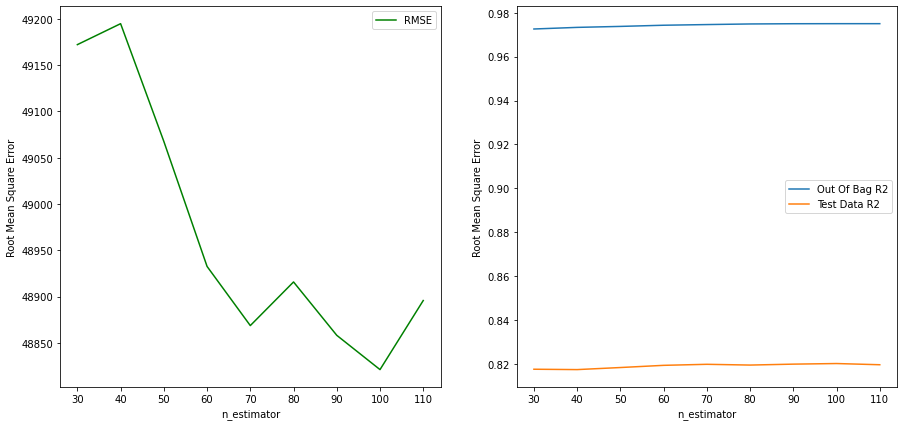

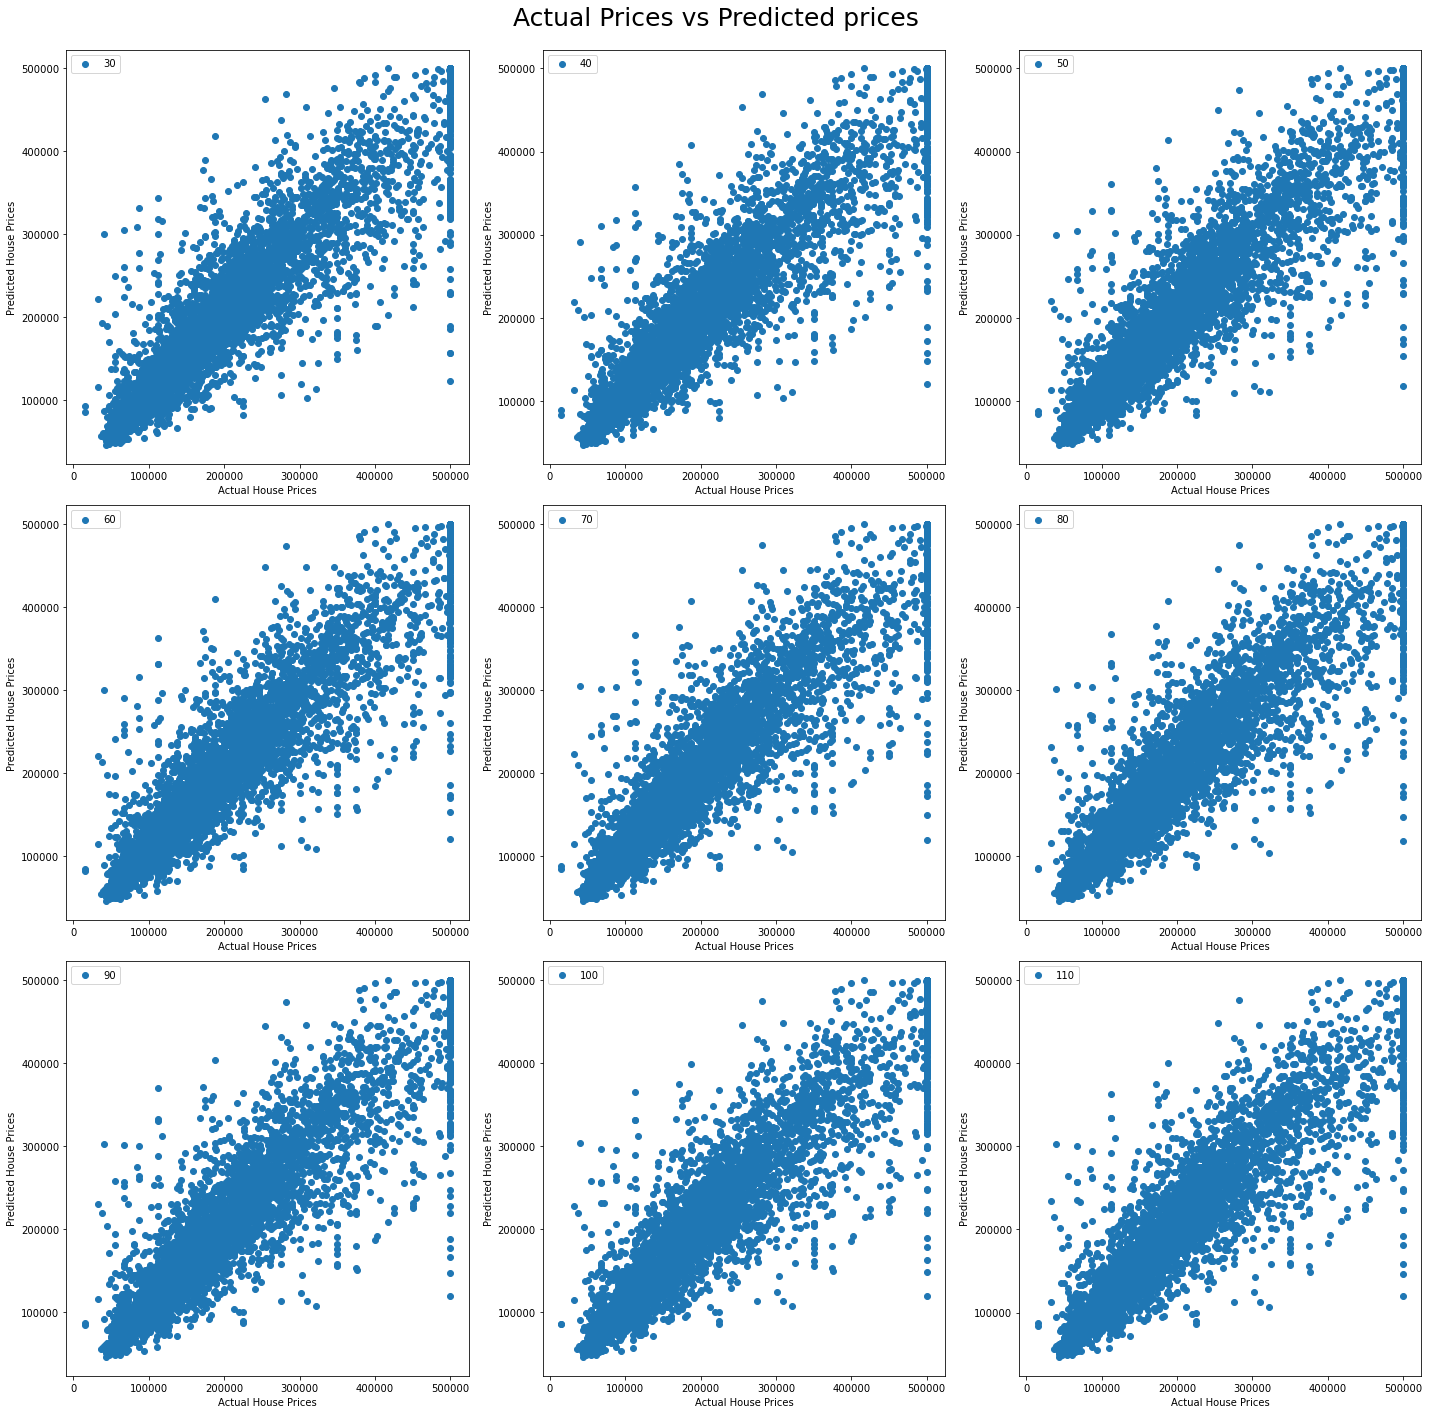

In [521]:
plottingResults(N, rf_RMSE, rf_r2_train, rf_r2_test)
plottingPred(y_test, rf_y_pred, rf_RMSE, rf_r2_train, rf_r2_test)

#### With Scale

In [318]:
rf_RMSE_s = []
rf_r2_train_s = [] 
rf_r2_test_s = [] 
rf_y_pred_s = [] 
rf_RMSE_s, rf_r2_train_s, rf_r2_test_s, rf_y_pred_s, rf_s = randomeForest(N, rf_RMSE_s, rf_r2_train_s, rf_r2_test_s, rf_y_pred_s, X_train, X_test, Y_train, Y_test)

Random Forest model performance at n_estimators = 30
Root Mean Squared Error: 0.47
Out-of-bag R-2 score estimate: 0.9713
Test data R-2 score: 0.7836
-------------------------------------------------------
Random Forest model performance at n_estimators = 40
Root Mean Squared Error: 0.46
Out-of-bag R-2 score estimate: 0.9724
Test data R-2 score: 0.7846
-------------------------------------------------------
Random Forest model performance at n_estimators = 50
Root Mean Squared Error: 0.46
Out-of-bag R-2 score estimate: 0.9731
Test data R-2 score: 0.7858
-------------------------------------------------------
Random Forest model performance at n_estimators = 60
Root Mean Squared Error: 0.46
Out-of-bag R-2 score estimate: 0.9733
Test data R-2 score: 0.7879
-------------------------------------------------------
Random Forest model performance at n_estimators = 70
Root Mean Squared Error: 0.46
Out-of-bag R-2 score estimate: 0.9738
Test data R-2 score: 0.7874
-------------------------------

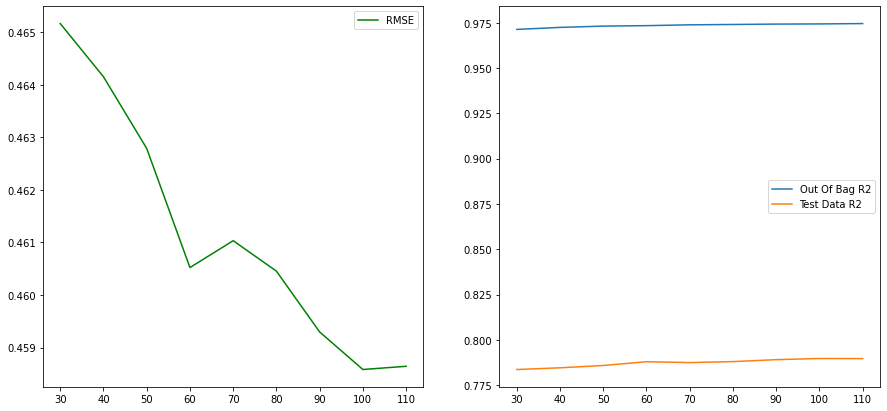

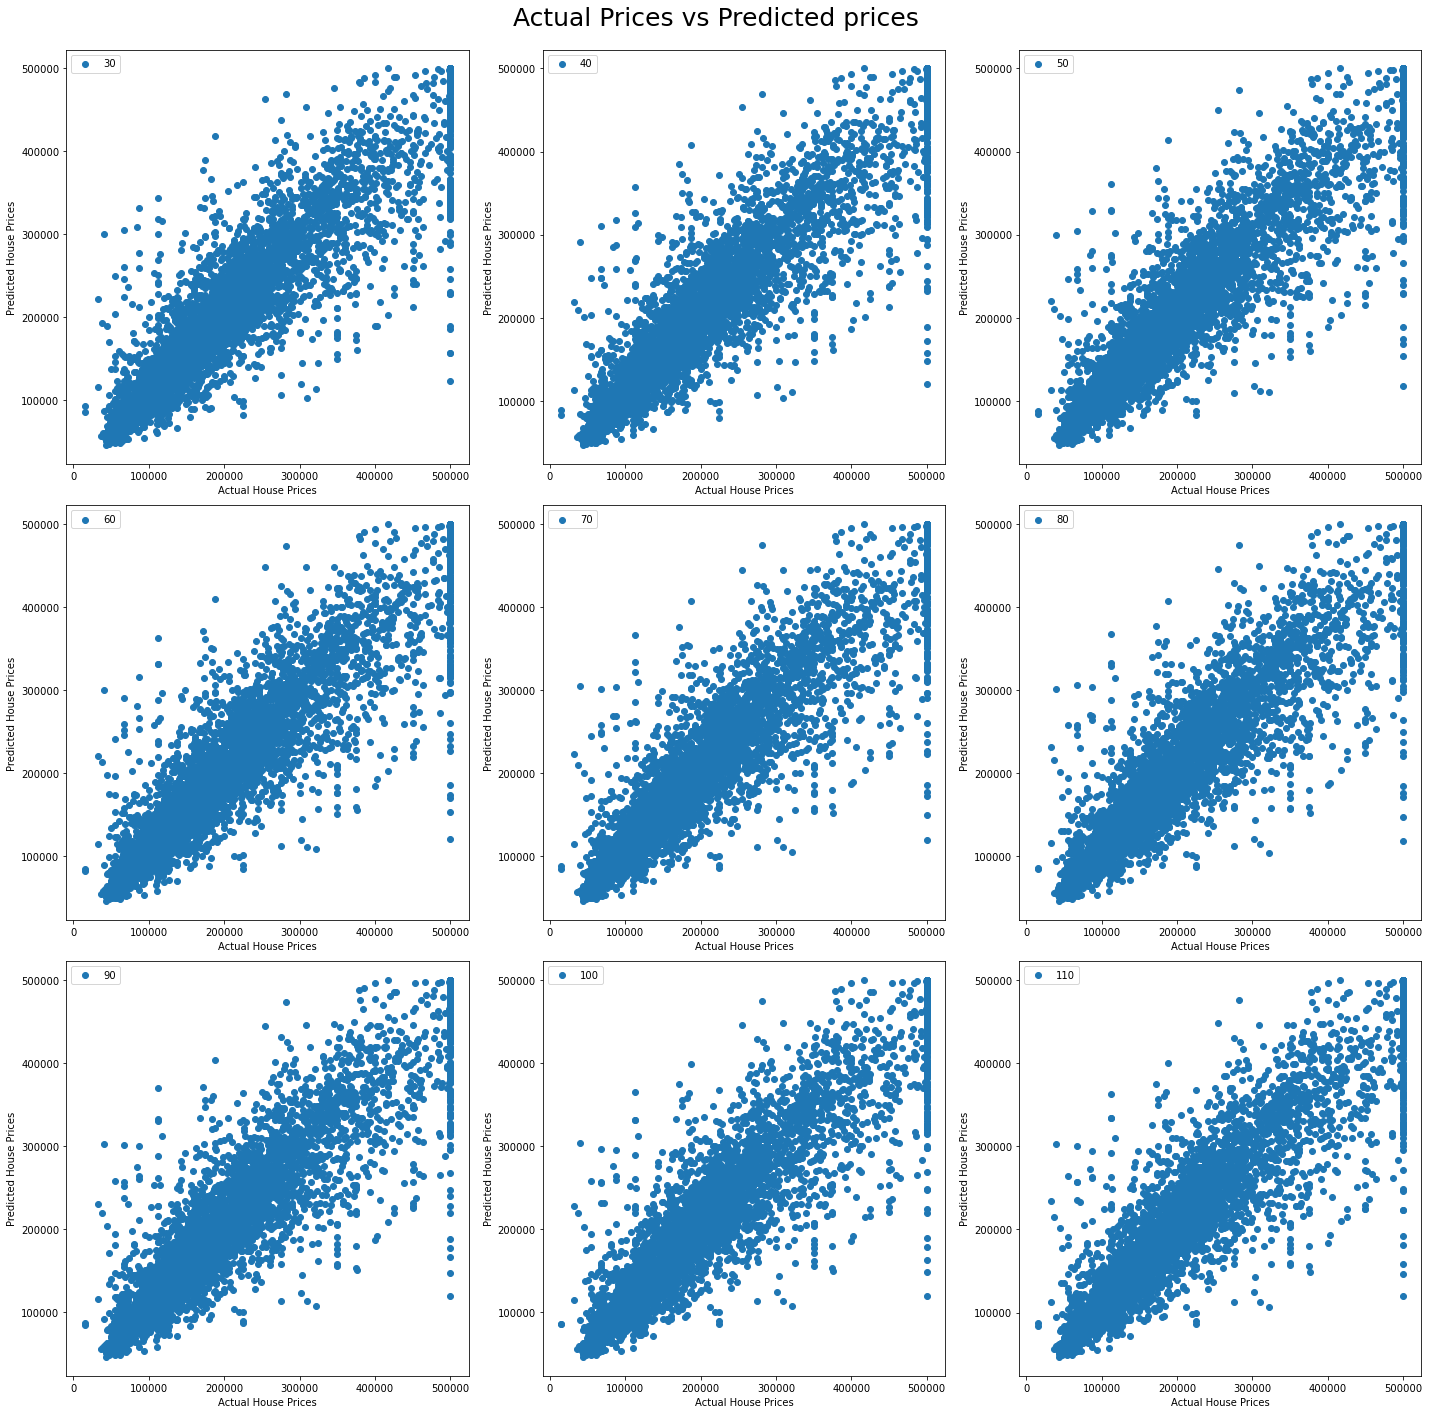

In [487]:
plottingResults(N, rf_RMSE_s, rf_r2_train_s, rf_r2_test_s)
plottingPred(y_test, rf_y_pred, rf_RMSE, rf_r2_train, rf_r2_test)

### Linear(Multivariate) Regression 

In [49]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [468]:
lr_RMSE = []
lr_r2_train = []
lr_r2_test = []
lr_y_pred = []

def linReg(lr_RMSE, lr_r2_train, lr_r2_test, lr_y_pred, x_train, y_train, x_test, y_test):
    reg = LinearRegression()
    reg.fit(x_train, y_train)
    lr_y_train_predict = reg.predict(x_train)
    lr_y_test_predict = reg.predict(x_test)

    lr_RMSE.append(np.sqrt(mean_squared_error(y_train, lr_y_train_predict)))
    lr_RMSE.append(np.sqrt(mean_squared_error(y_test, lr_y_test_predict)))

    lr_r2_train = round(reg.score(x_train, y_train),2)
    lr_r2_test = round(reg.score(x_test, y_test),2)

    lr_y_pred = reg.predict(x_test)

    return lr_RMSE, lr_r2_train, lr_r2_test, lr_y_pred, reg

def summaryLinReg(RMSE, r2_train, r2_test, y_pred, y_test):
    print("Linear Regression model performance for training set")
    print("-------------------------------------------------------")
    print("Root Mean Squared Error: {}".format(RMSE[0]))
    print(f'Train data R-2 score: {r2_train:>5.4}')
    print("\n")

    print("Linear Regression model performance for testing set")
    print("-------------------------------------------------------")
    print("Root Mean Squared Error: {}".format(RMSE[1]))
    print(f'Test data R-2 score: {r2_test:>5.4}')
    
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual House Prices")
    plt.ylabel("Predicted House Prices")
    plt.title("Actual Prices vs Predicted prices")

#### median_income & <1H OCEAN

Linear Regression model performance for training set
-------------------------------------------------------
Root Mean Squared Error: 82277.84520136389
Train data R-2 score:  0.49


Linear Regression model performance for testing set
-------------------------------------------------------
Root Mean Squared Error: 81484.96326218621
Test data R-2 score:  0.51


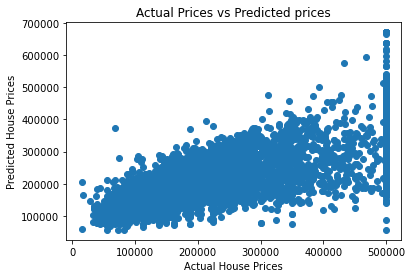

In [548]:
lr_RMSE_h = []
lr_r2_train_h = []
lr_r2_test_h = []
lr_y_pred_h = []
lr_RMSE_h, lr_r2_train_h, lr_r2_test_h, lr_y_pred_h, lr_h = linReg(lr_RMSE_h, lr_r2_train_h, lr_r2_test_h, lr_y_pred_h, x_train[:,7:9], y_train, x_test[:,7:9], y_test)

summaryLinReg(lr_RMSE_h, lr_r2_train_h, lr_r2_test_h, lr_y_pred_h, y_test)

Linear Regression model performance for training set
-------------------------------------------------------
Root Mean Squared Error: 68635.52932478102
Train data R-2 score:  0.65


Linear Regression model performance for testing set
-------------------------------------------------------
Root Mean Squared Error: 68666.86644340093
Test data R-2 score:  0.64


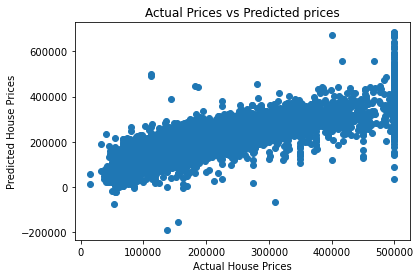

In [475]:
lr_RMSE, lr_r2_train, lr_r2_test, lr_y_pred, lr = linReg(lr_RMSE, lr_r2_train, lr_r2_test, lr_y_pred, x_train, y_train, x_test, y_test)

summaryLinReg(lr_RMSE, lr_r2_train, lr_r2_test, lr_y_pred, y_test)

In [517]:
# Support Vector Regression
from sklearn.svm import SVR
model_svr = SVR(kernel="rbf")
model_svr.fit(X_train, Y_train.ravel())

# Perform prediction and model score
y_pred = model_svr.predict(X_test)

svr_r2_train = model_svr.score(X_train, Y_train)
svr_r2_test = r2_score(Y_test, y_pred)

Support Vector Regressor model performance
-------------------------------------------------------
Root Mean Squared Error: 0.4903237391846313
Train data R-2 score: 0.767
Test  data R-2 score:  0.76


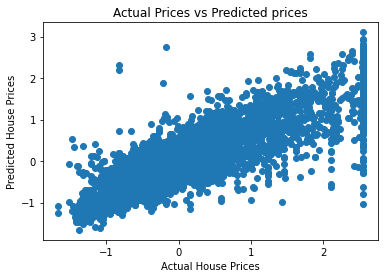

In [519]:
print("Support Vector Regressor model performance")
print("-------------------------------------------------------")
print("Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(Y_test,y_pred))))
print(f'Train data R-2 score: {svr_r2_train:>5.3}')
print(f'Test  data R-2 score: {svr_r2_test:>5.3}')

plt.scatter(Y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Prices vs Predicted prices")
plt.show()

Text(0.5, 1.0, 'Actual Prices vs Predicted prices')

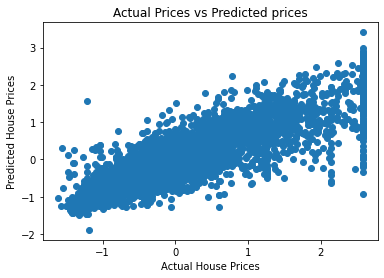

In [214]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual Prices vs Predicted prices")

## Improvement

### Removing the Outliers -> Redo Initial Approach

In [405]:
preprocess_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,OP_<1H OCEAN,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [414]:
from sklearn.cluster import DBSCAN
def remove_outliers_DBSCAN(df,eps,min_samples):
    outlier_detection = DBSCAN(eps = eps, min_samples = min_samples)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    return data['cluster']

In [434]:
dropped_df = preprocess_df

In [435]:
clusters=remove_outliers_DBSCAN((dropped_df['total_rooms']),0.5,5)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
dropped_df = dropped_df.drop(dropped_df.index[ind_outlier])

In [436]:
clusters=remove_outliers_DBSCAN((dropped_df['population']),0.5,5)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
dropped_df = dropped_df.drop(dropped_df.index[ind_outlier])

In [437]:
clusters=remove_outliers_DBSCAN((dropped_df['households']),0.5,5)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
dropped_df = dropped_df.drop(dropped_df.index[ind_outlier])

In [438]:
clusters=remove_outliers_DBSCAN((dropped_df['total_bedrooms']),0.5,5)
clusters.value_counts().sort_values(ascending=False)
df_cluster=pd.DataFrame(clusters)
ind_outlier=df_cluster.index[df_cluster['cluster']==-1]
dropped_df = dropped_df.drop(dropped_df.index[ind_outlier])

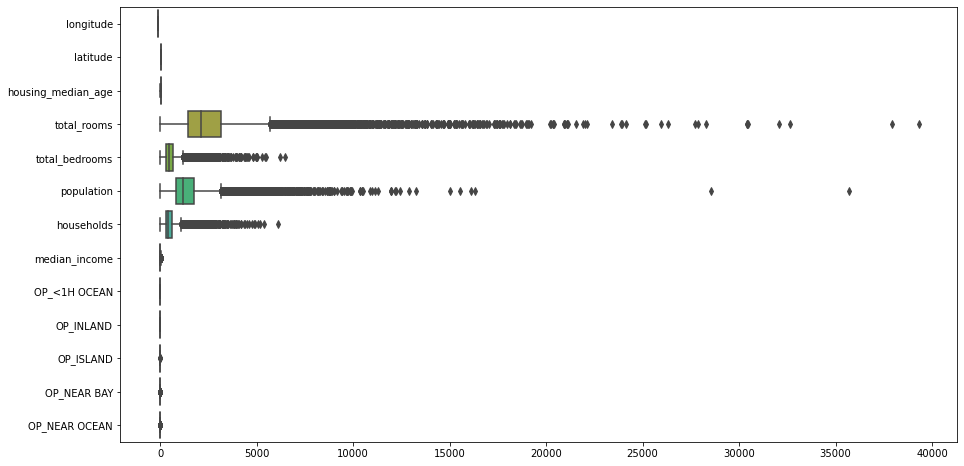

<AxesSubplot:>

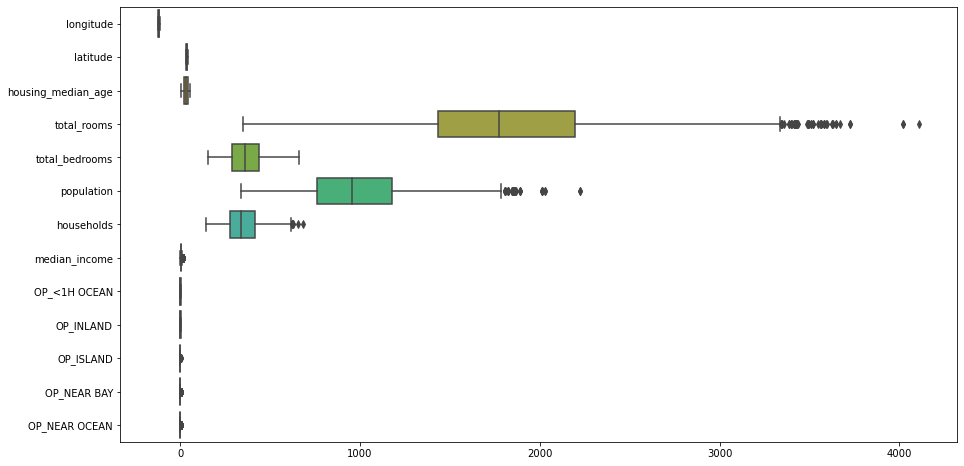

In [440]:
plt.figure(figsize=(15,8))
sns.boxplot(data=preprocess_df.iloc[:,:-1],orient="h")
plt.show()
plt.figure(figsize=(15,8))
sns.boxplot(data=dropped_df.iloc[:,:-1],orient="h")
# dropped_df['total_rooms']

In [554]:
dropped_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,OP_<1H OCEAN,OP_INLAND,OP_ISLAND,OP_NEAR BAY,OP_NEAR OCEAN,median_house_value
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,0,0,0,1,0,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,0,0,0,1,0,299200.0
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,0,0,0,1,0,281500.0
12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,0,0,0,1,0,213500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,0,1,0,0,0,116800.0
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


In [493]:
x_train_o, x_test_o, y_train_o, y_test_o, X_train_o, X_test_o, Y_train_o, Y_test_o, feats_o, price_o = pp(dropped_df)

In [494]:
rf_RMSE_o = []
rf_r2_train_o = []
rf_r2_test_o = []
rf_y_pred_o = []

rf_RMSE_o, rf_r2_train_o, rf_r2_test_o, rf_y_pred_o, rf_o= randomeForest(N, rf_RMSE_o, rf_r2_train_o, rf_r2_test_o, rf_y_pred_o, x_train_o, x_test_o, y_train_o, y_test_o)

Random Forest model performance at n_estimators = 30
Root Mean Squared Error: 48775.77
Out-of-bag R-2 score estimate: 0.9711
Test data R-2 score: 0.8281
-------------------------------------------------------
Random Forest model performance at n_estimators = 40
Root Mean Squared Error: 48663.65
Out-of-bag R-2 score estimate: 0.9724
Test data R-2 score: 0.8289
-------------------------------------------------------
Random Forest model performance at n_estimators = 50
Root Mean Squared Error: 48339.78
Out-of-bag R-2 score estimate: 0.9731
Test data R-2 score: 0.8312
-------------------------------------------------------
Random Forest model performance at n_estimators = 60
Root Mean Squared Error: 48277.48
Out-of-bag R-2 score estimate: 0.9736
Test data R-2 score: 0.8316
-------------------------------------------------------
Random Forest model performance at n_estimators = 70
Root Mean Squared Error: 48243.67
Out-of-bag R-2 score estimate: 0.9741
Test data R-2 score: 0.8318
-----------

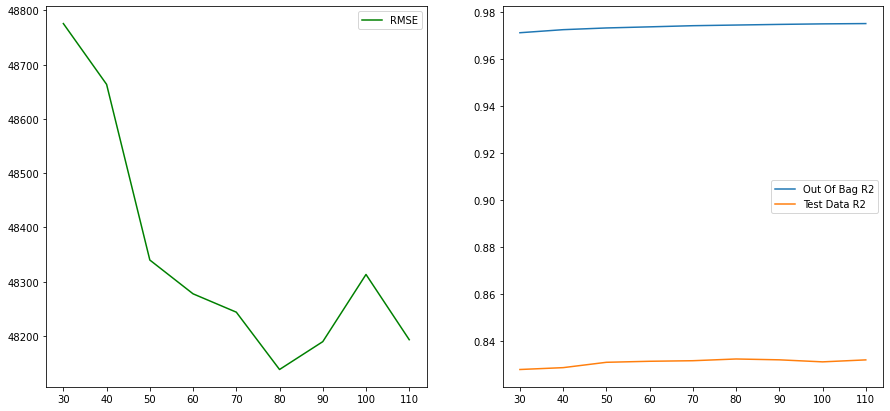

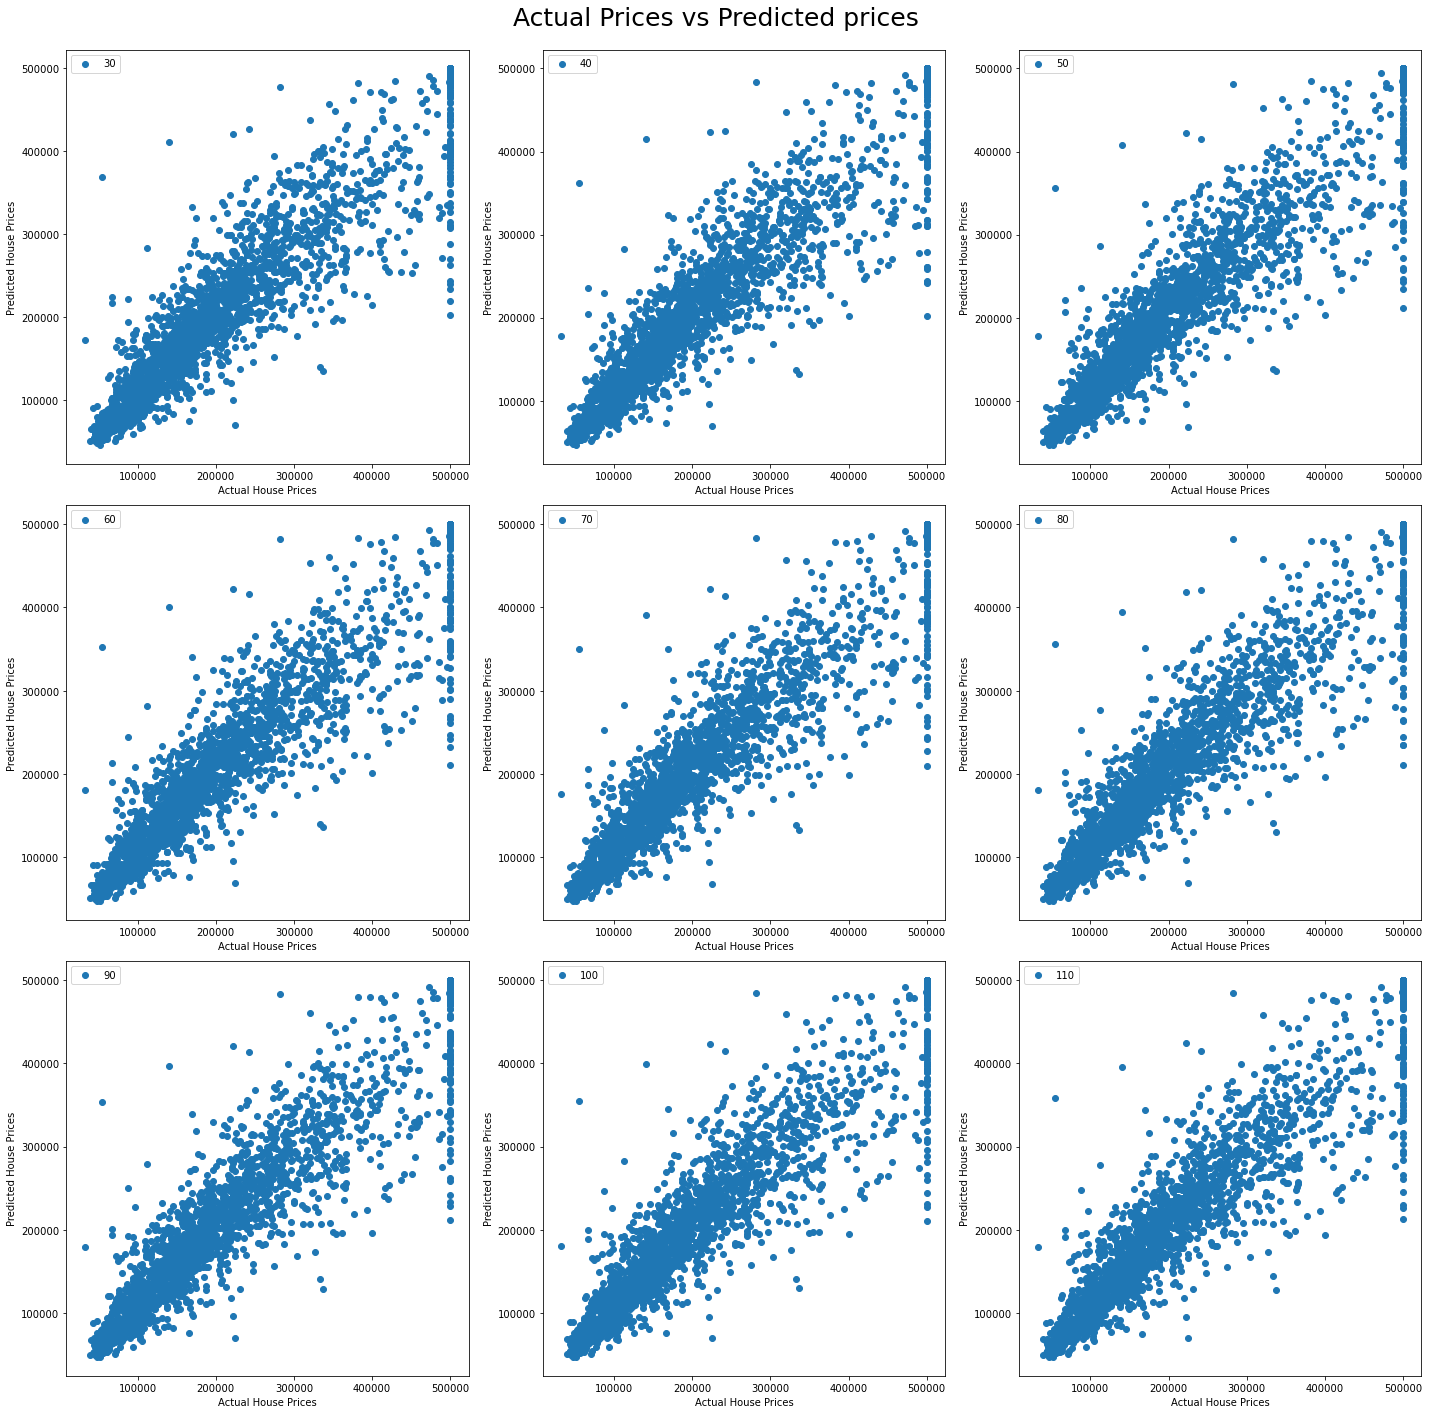

In [445]:
plottingResults(N, rf_RMSE_o, rf_r2_train_o, rf_r2_test_o)
plottingPred(y_test, rf_y_pred_o, rf_RMSE_o, rf_r2_train_o, rf_r2_test_o)

### PCA -> Redo Initial Approach

In [457]:
from sklearn.decomposition import PCA
housing_features_pca = PCA()
housing_features_pca.fit(preprocess_df[['total_rooms','total_bedrooms']]) #Column8:"total_rooms" and Column9:"total_bedrooms"
housing_features_pca.explained_variance_ratio_

array([0.99533288, 0.00466712])

In [461]:
pca_df = preprocess_df.drop(columns=['total_bedrooms'])

In [483]:
x_train_p, x_test_p, y_train_p, y_test_p, X_train_p, X_test_p, Y_train_p, Y_test_p, feats_p, price_p = pp(dropped_df)

Random Forest model performance at n_estimators = 30
Root Mean Squared Error: 50553.38
Out-of-bag R-2 score estimate: 0.9719
Test data R-2 score: 0.8043
-------------------------------------------------------
Random Forest model performance at n_estimators = 40
Root Mean Squared Error: 50149.67
Out-of-bag R-2 score estimate: 0.9733
Test data R-2 score: 0.8075
-------------------------------------------------------
Random Forest model performance at n_estimators = 50
Root Mean Squared Error: 49874.31
Out-of-bag R-2 score estimate: 0.9738
Test data R-2 score: 0.8096
-------------------------------------------------------
Random Forest model performance at n_estimators = 60
Root Mean Squared Error: 49901.97
Out-of-bag R-2 score estimate: 0.9741
Test data R-2 score: 0.8094
-------------------------------------------------------
Random Forest model performance at n_estimators = 70
Root Mean Squared Error: 49830.43
Out-of-bag R-2 score estimate: 0.9743
Test data R-2 score: 0.8099
-----------

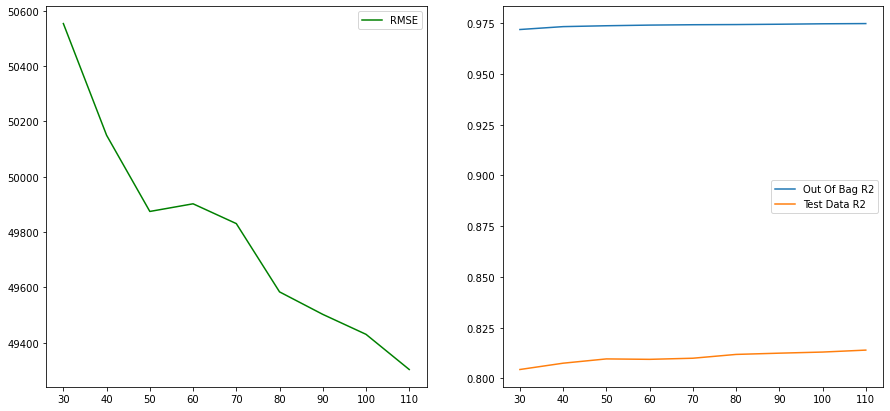

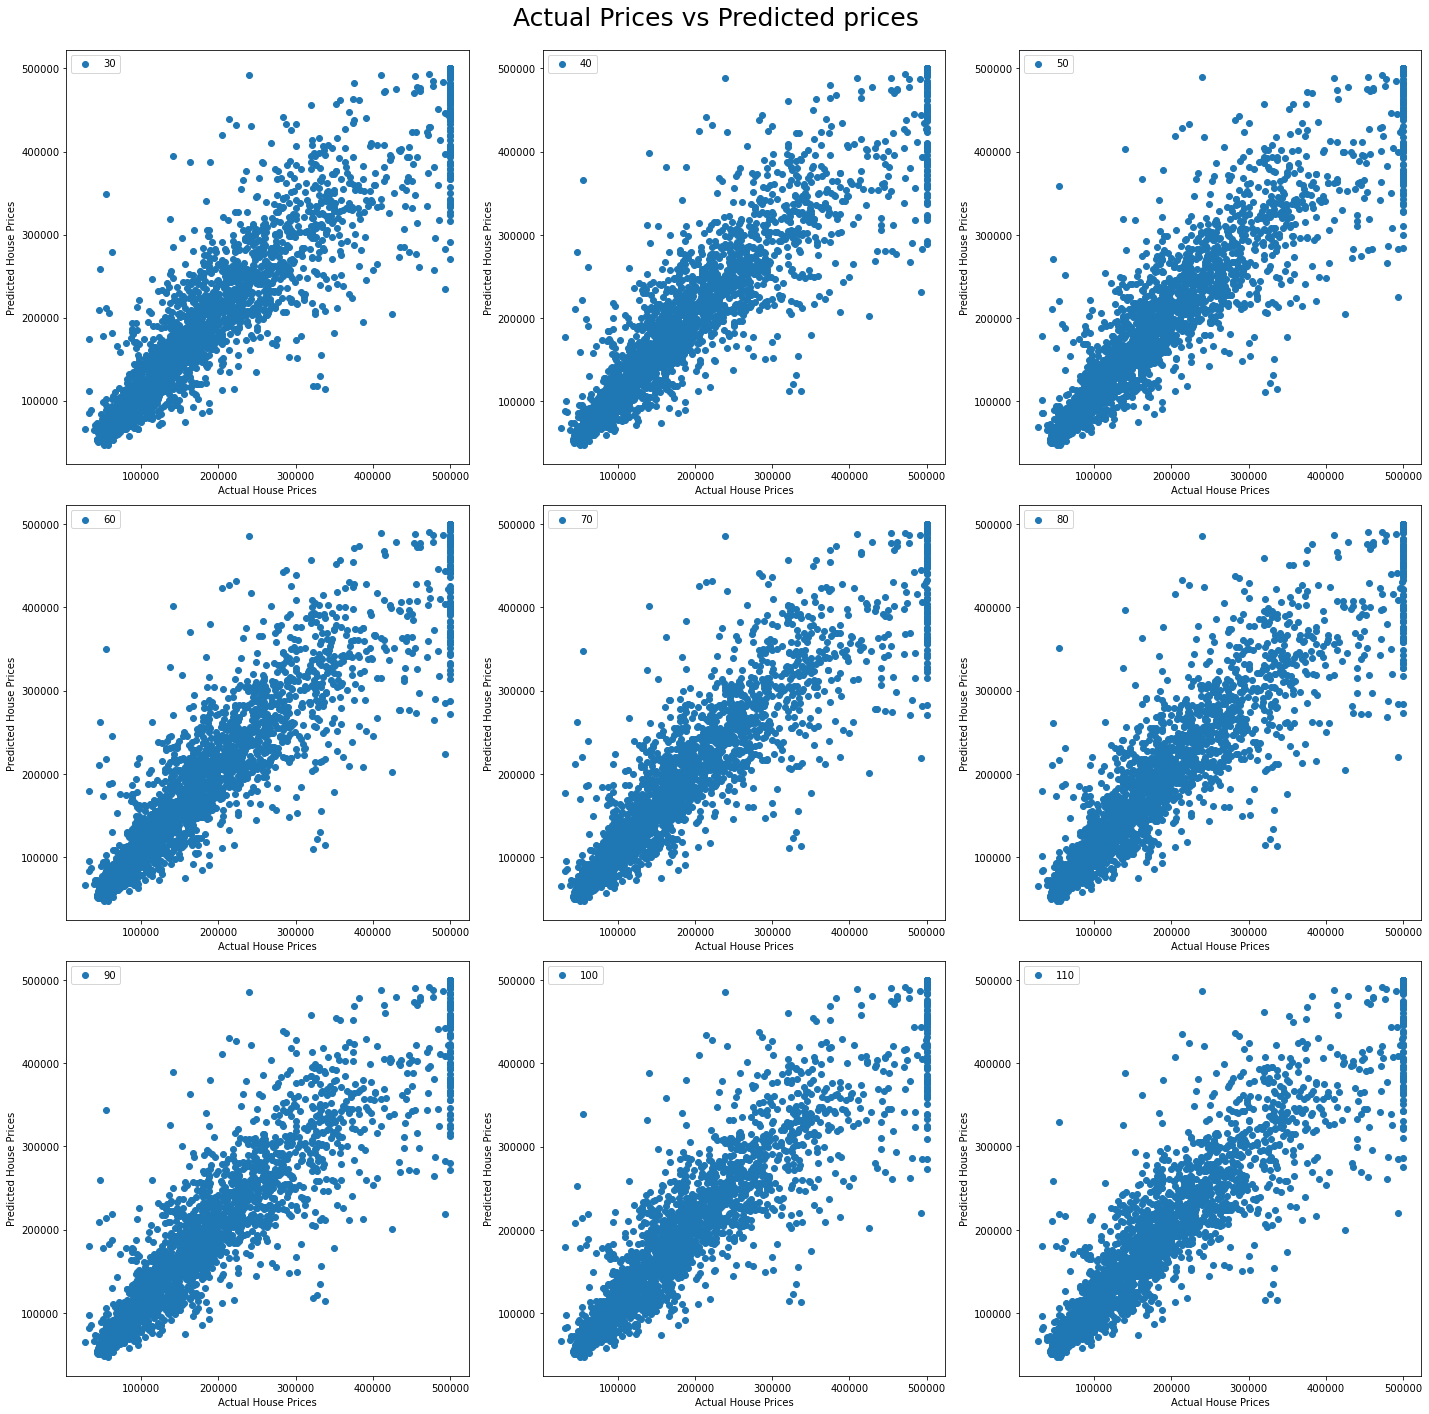

In [491]:
rf_RMSE_p = []
rf_r2_train_p = []
rf_r2_test_p = []
rf_y_pred_p = []

rf_RMSE_p, rf_r2_train_p, rf_r2_test_p, rf_y_pred_p, rf_p = randomeForest(N, rf_RMSE_p, rf_r2_train_p, rf_r2_test_p, rf_y_pred_p, x_train_p, x_test_p, y_train_p, y_test_p)
plottingResults(N, rf_RMSE_p, rf_r2_train_p, rf_r2_test_p)
plottingPred(y_test_p, rf_y_pred_p, rf_RMSE_p, rf_r2_train_p, rf_r2_test_p)

### Bagging 

In [499]:
from sklearn.ensemble import BaggingRegressor

def bagging_predictions(estimator, X_train, X_test, y_train, y_test):
    bag_reg = BaggingRegressor(base_estimator=estimator,
                            n_estimators=100,
                            max_samples=1.0,
                            bootstrap=True, # Samples are drawn with replacement
                            random_state=20).fit(X_train, y_train.ravel())

    br_y_pred = bag_reg.predict(X_test)

    rmse_val = mean_squared_error(y_test, br_y_pred, squared= False) # squared= False > returns Root Mean Square Error   

    print(f'RMSE for base estimator {bag_reg.base_estimator_} = {rmse_val}\n')
    return br_y_pred


models_scores=[]
predictions = np.column_stack((bagging_predictions(lr, x_train, x_test, y_train, y_test),
                              bagging_predictions(rf, x_train, x_test, y_train, y_test),
                              bagging_predictions(model_svr, x_train, x_test, y_train, y_test)))

print(f"Bagged predictions shape: {predictions.shape}")
       
y_pred = np.mean(predictions, axis=1)

rmse_val = mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error   
models_scores.append(['Bagging', rmse_val])

print(f'\nBagging RMSE= {rmse_val}')

RMSE for base estimator LinearRegression() = 68662.34504500654

RMSE for base estimator RandomForestRegressor(n_estimators=110, oob_score=True, random_state=0) = 49563.376190647

RMSE for base estimator SVR() = 118282.88057668543

Bagged predictions shape: (5109, 3)
Aggregated predictions (y_pred) shape (5109,)

Bagging RMSE= 67630.50562214947


### Boosting

In [504]:
from sklearn.ensemble import GradientBoostingRegressor
def rmse(model):
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) 

GradientBoostingRegressor Score= 46622.80198308925


In [514]:
eta = [0.001, 0.005, 0.01, 0.05, 0.10, 0.15, 0.2, 0.25]
for i in range(1, 10):
    print("n_estimator: ", int(i*50))
    for j in range(8):
        gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=int(i*300), learning_rate=eta[j],
                                           max_depth=4, max_features='sqrt',
                                           min_samples_leaf=15, min_samples_split=10, 
                                           loss='huber', random_state = 20)

        score = rmse(gradient_boosting_regressor)
        models_scores.append(['GradientBoostingRegressor', score])
        print(f'GradientBoostingRegressor Score= {score},    Eta:{eta[j]} ')

n_estimator:  50
GradientBoostingRegressor Score= 104576.64162725038,    Eta:0.001 
GradientBoostingRegressor Score= 76451.45891967825,    Eta:0.005 
GradientBoostingRegressor Score= 65245.567088171774,    Eta:0.01 
GradientBoostingRegressor Score= 52645.599406191155,    Eta:0.05 
GradientBoostingRegressor Score= 50444.988448994205,    Eta:0.1 
GradientBoostingRegressor Score= 48829.48615710142,    Eta:0.15 
GradientBoostingRegressor Score= 48565.62560268434,    Eta:0.2 
GradientBoostingRegressor Score= 48802.3470257485,    Eta:0.25 
n_estimator:  100
GradientBoostingRegressor Score= 94333.16913324782,    Eta:0.001 
GradientBoostingRegressor Score= 65332.40863064503,    Eta:0.005 
GradientBoostingRegressor Score= 58378.764577445516,    Eta:0.01 
GradientBoostingRegressor Score= 49667.55146626212,    Eta:0.05 
GradientBoostingRegressor Score= 48673.2819671094,    Eta:0.1 
GradientBoostingRegressor Score= 47495.10674397481,    Eta:0.15 
GradientBoostingRegressor Score= 47371.33212282665,